In [74]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import SVC classifier
from sklearn.svm import SVC

# Hyperparameter tunning libraries
from sklearn.model_selection import RandomizedSearchCV

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Reading the data
df_train = pd.read_csv('pulsar_data_train.csv')
df_test = pd.read_csv('pulsar_data_test.csv')

In [3]:
# Visualizing the dataframe
df_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [5]:
# Checking the shape of the data
df_train.shape

(12528, 9)

In [6]:
df_test.shape

(5370, 9)

In [7]:
#Checking for null values and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [9]:
# Null values
df_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [10]:
# Null values
df_test.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

In [11]:
#description
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,12528.0,111.041841,25.672828,5.812500,100.871094,115.183594,127.109375,189.734375
Standard deviation of the integrated profile,12528.0,46.521437,6.801077,24.772042,42.362222,46.931022,50.979103,91.808628
Excess kurtosis of the integrated profile,10793.0,0.478548,1.064708,-1.738021,0.024652,0.223678,0.473125,8.069522
Skewness of the integrated profile,12528.0,1.778431,6.208450,-1.791886,-0.188142,0.203317,0.932374,68.101622
Mean of the DM-SNR curve,12528.0,12.674758,29.613230,0.213211,1.910535,2.792642,5.413253,222.421405
Standard deviation of the DM-SNR curve,11350.0,26.351318,19.610842,7.370432,14.404353,18.412402,28.337418,110.642211
Excess kurtosis of the DM-SNR curve,12528.0,8.333489,4.535783,-3.139270,5.803063,8.451097,10.727927,34.539844
Skewness of the DM-SNR curve,11903.0,105.525779,107.399585,-1.976976,35.199899,83.126301,139.997850,1191.000837
target_class,12528.0,0.092034,0.289085,0.000000,0.000000,0.000000,0.000000,1.000000


In [12]:
#description
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,5370.0,111.168917,25.608635,6.179688,101.041016,114.757812,127.023438,192.617188
Standard deviation of the integrated profile,5370.0,46.615074,6.940638,24.791612,42.408020,47.031304,51.133444,98.778911
Excess kurtosis of the integrated profile,4603.0,0.483676,1.076893,-1.876011,0.030643,0.227314,0.475056,7.608370
Skewness of the integrated profile,5370.0,1.751260,6.072820,-1.764717,-0.189557,0.186468,0.918807,65.385974
Mean of the DM-SNR curve,5370.0,12.473587,29.145134,0.213211,1.956522,2.830686,5.590301,223.392141
Standard deviation of the DM-SNR curve,4846.0,26.425371,19.384489,7.370432,14.555826,18.549670,28.681787,109.712649
Excess kurtosis of the DM-SNR curve,5370.0,8.233724,4.435683,-2.721857,5.700461,8.383695,10.632265,34.539844
Skewness of the DM-SNR curve,5126.0,102.869088,104.748418,-1.964998,33.817330,81.392046,136.893502,1191.000837
target_class,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'target')

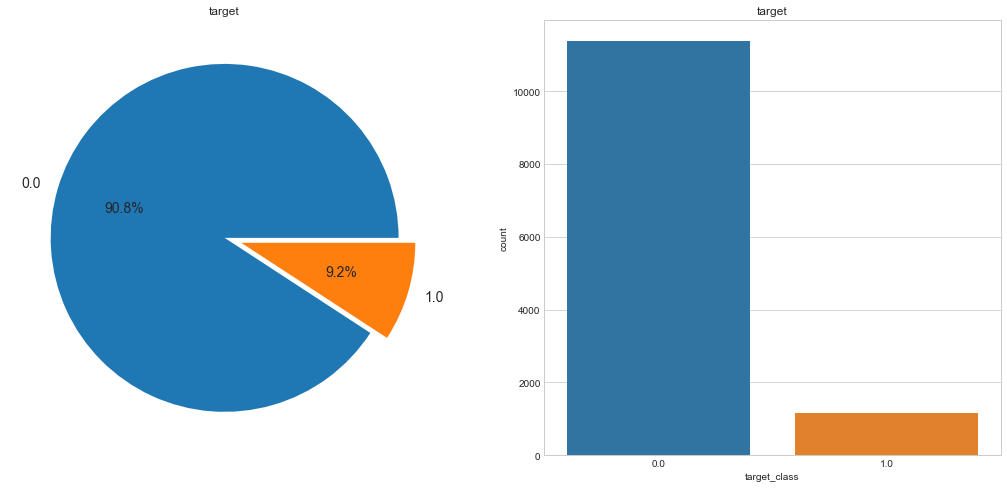

In [16]:
#Plotting target distribution
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['target_class'].value_counts().plot.pie(ax = ax[0], explode=[0,0.1],autopct='%1.1f%%',shadow=False, textprops={'fontsize': 14})
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target_class',data=df_train,ax=ax[1])
ax[1].set_title('target')

# Preprocessing

In [18]:
# Checking the column names
df_train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [20]:
# Getting the feature and target matrices
target = df_train["target_class"]
features = df_train.drop("target_class", axis=1)

## EDA

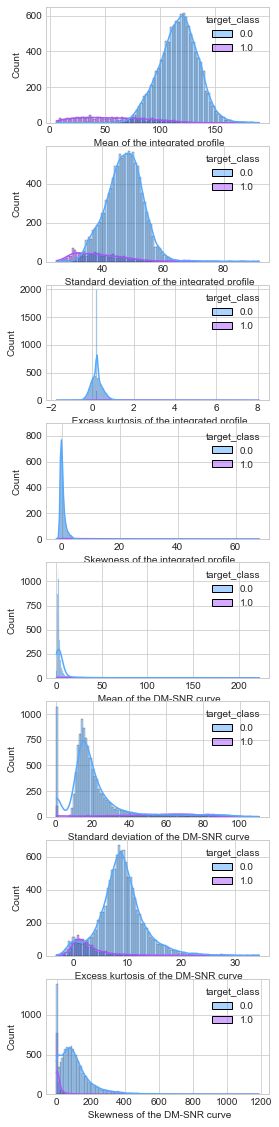

In [76]:
# Creating histplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(4,20))
for i in range(len(features.columns)):
    col = features.columns[i]
    sns.histplot(x=df_train[col], hue=target, palette="cool", kde=True, ax=axes[i])
plt.show()

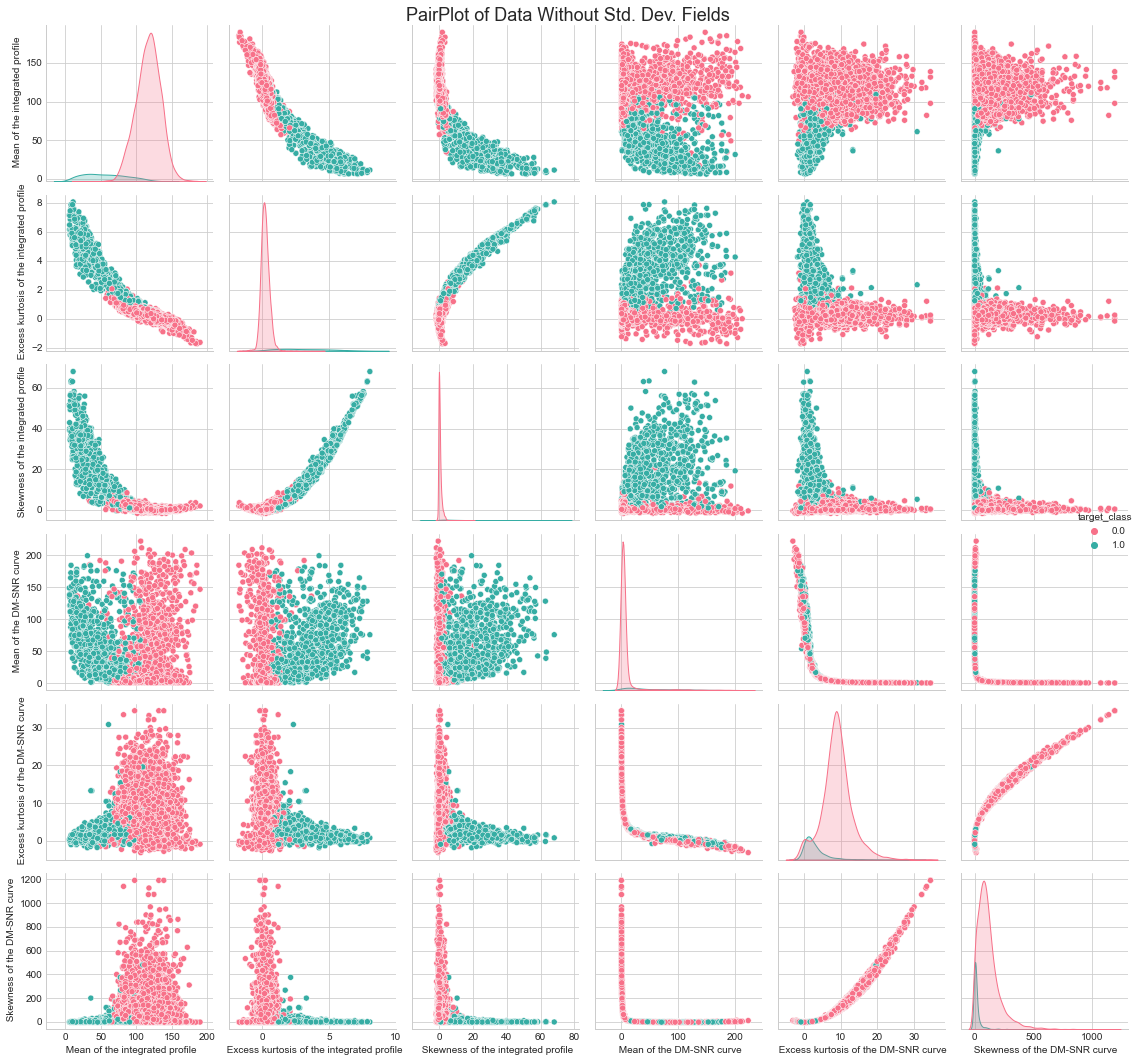

In [25]:
# Pairplotusing seaborn
sns.pairplot(data=df_train,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

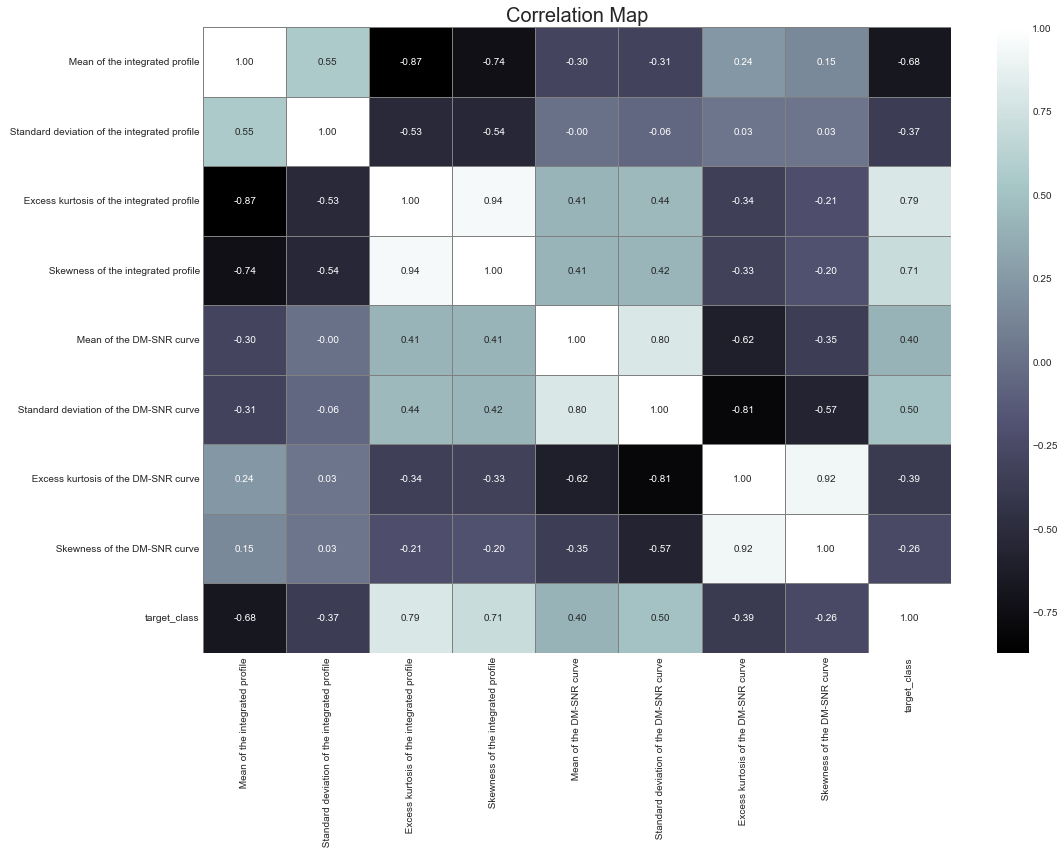

In [26]:
#Plotting the Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(data=df_train.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()  

### Handling Missing Values

In [31]:
3 Computing the median for the three features with null values
median1 = df_train[' Excess kurtosis of the integrated profile'].median()
median2 = df_train[' Standard deviation of the DM-SNR curve'].median()
median3 = df_train[' Skewness of the DM-SNR curve'].median()

In [35]:
# Imputing the null values
df_train[' Excess kurtosis of the integrated profile'] = df_train[' Excess kurtosis of the integrated profile'].fillna(median1)
df_test[' Excess kurtosis of the integrated profile'] = df_test[' Excess kurtosis of the integrated profile'].fillna(median1)

df_train[' Standard deviation of the DM-SNR curve'] = df_train[' Standard deviation of the DM-SNR curve'].fillna(median1)
df_test[' Standard deviation of the DM-SNR curve'] = df_test[' Standard deviation of the DM-SNR curve'].fillna(median1)

df_train[' Skewness of the DM-SNR curve'] = df_train[' Skewness of the DM-SNR curve'].fillna(median1)
df_test[' Skewness of the DM-SNR curve'] = df_test[' Skewness of the DM-SNR curve'].fillna(median1)

In [36]:
# Checking for null values again
df_train.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [37]:
df_test.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile          0
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve             0
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                       0
target_class                                     5370
dtype: int64

# Modelling

In [39]:
# Splitting into test and train data
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2)

In [40]:
print(xtrain.shape)
print(xtest.shape)

(10022, 8)
(2506, 8)


In [42]:
# Using standard scalar to scale
ss = StandardScaler()
ss.fit(xtrain)
xtrain_array = ss.transform(xtrain)
xtest_array = ss.transform(xtest)

In [43]:
xtrain = pd.DataFrame(xtrain_array, columns = xtrain.columns)
xtest = pd.DataFrame(xtest_array, columns=xtest.columns)

### Running SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [49]:
xtrain.fillna(0, inplace=True)
xtest.fillna(0, inplace=True)

In [53]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(xtrain,ytrain)


# make predictions on test set
y_pred=svc.predict(xtest)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))
print('Model f1 score with default hyperparameters: {0:0.4f}'. format(f1_score(ytest, y_pred)))

Model accuracy score with default hyperparameters: 0.9741
Model f1 score with default hyperparameters: 0.8426


### Using Random Search to find the best hyperparameters

In [56]:
# USing grid search 
svc_clf = SVC()
params = [{
    'C':np.arange(0.01,10.0,0.1),
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':range(1,20),
    "gamma" : ['scale','auto'],
    'probability':[True],
    'class_weight':['balanced'],
    'random_state':[21],
    'max_iter':[-1],
}]


random_search_svc_clf = RandomizedSearchCV(svc_clf, scoring = 'f1', param_distributions=params, n_jobs = -1, return_train_score = True, n_iter=100, cv=2, random_state=21)
random_search_svc_clf.fit(xtrain,ytrain)
print("Best parameters scores:")
print(random_search_svc_clf.best_params_)
df = pd.DataFrame(random_search_svc_clf.cv_results_)
print("Mean Train Score:", random_search_svc_clf.cv_results_['mean_train_score'][df[df['mean_test_score']==random_search_svc_clf.best_score_].index][0])
print("Mean Validation score:", random_search_svc_clf.best_score_)

Best parameters scores:
{'random_state': 21, 'probability': True, 'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 9, 'class_weight': 'balanced', 'C': 2.51}
Mean Train Score: 0.8691440763105074
Mean Validation score: 0.8572325581395349


Building the best model

In [61]:
clf = SVC(random_state=21, probability= True, max_iter= -1, kernel= 'rbf', gamma= 'auto', degree = 9, class_weight= 'balanced', C= 2.51)

# fit classifier to training set
clf.fit(xtrain,ytrain)


# make predictions on test set
y_pred=clf.predict(xtest)

In [64]:
cm = confusion_matrix(ytest, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2231   46]
 [  34  195]]

True Positives(TP) =  2231

True Negatives(TN) =  195

False Positives(FP) =  46

False Negatives(FN) =  34


<AxesSubplot:>

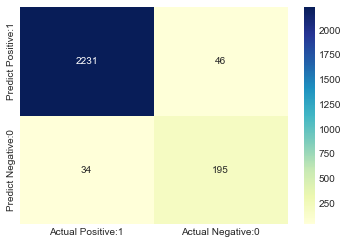

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [67]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2277
         1.0       0.81      0.85      0.83       229

    accuracy                           0.97      2506
   macro avg       0.90      0.92      0.91      2506
weighted avg       0.97      0.97      0.97      2506



In [72]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Precision : 0.9798
Recall or Sensitivity : 0.9850
True Positive Rate : 0.9850
False Positive Rate : 0.1909
Specificity : 0.8091


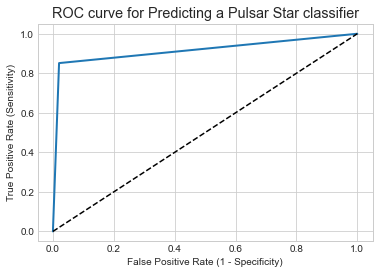

In [73]:
# plot ROC Curve

fpr, tpr, thresholds = roc_curve(ytest, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [75]:
ROC_AUC = roc_auc_score(ytest, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9157
